In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 gglot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
# 데이터 로드
df_standard = pd.read_csv("data/무게추세 교과서.csv")
df_standard.shape
df_standard['date'] = df_standard['date'].astype(str)
df_standard['date'] = pd.to_datetime(df_standard['date'])


In [6]:
df_total = pd.read_csv("data/막곡농장(NAS) 2021-12-16 ~ 2022-01-13 (pixel weight).csv")
df_total.shape

(20320, 14)

In [7]:
df_total = df_total[(~(df_total['WEIGHT_PREDICTION_WEIGHT'] == '\\N'))]
df_total = df_total[~df_total['WEIGHT_PREDICTION_PIXEL_MEAN'].isnull()]
df_total['date'] = pd.to_datetime(df_total['CREATE_TIME'])

In [8]:
df_total

,TID,CREATE_TIME,FARM_ID,GATEWAY_ID,HOUSE_ID,MODULE_ID,DATA_TYPE,ORG_FILE_NAME,WEIGHT_PREDICTION_RESULT_FILE_NAME,WEIGHT_PREDICTION_COUNT,WEIGHT_PREDICTION_PIXEL_MEAN,WEIGHT_PREDICTION_WEIGHT,WEIGHT_PREDICTION_STATUS,FILE_SIZE,date
263,5b58f3844d8e,2021-12-16 17:36:20,FA0006,GW01,H02,"CT02,6",real,"FA0006_GW01_H02_CT02,6_20211216173620_farm_ima...","FA0006_GW01_H02_CT02,6_20211216173620_farm_ima...",7.0,"[1561,1783,1720,1449,1843,1621,1593]",77.9,success,\N,2021-12-16 17:36:20
264,82ca63c845e4,2021-12-16 17:36:38,FA0006,GW01,H03,"CT03,6",real,"FA0006_GW01_H03_CT03,6_20211216173638_farm_ima...","FA0006_GW01_H03_CT03,6_20211216173638_farm_ima...",3.0,"[1951,1760,1948]",89.9,success,\N,2021-12-16 17:36:38
265,af8a5ae34dc1,2021-12-16 17:36:47,FA0006,GW01,H04,"CT04,6",real,"FA0006_GW01_H04_CT04,6_20211216173647_farm_ima...","FA0006_GW01_H04_CT04,6_20211216173647_farm_ima...",2.0,"[1884,1757]",86.5,success,\N,2021-12-16 17:36:47
266,8275559d4c78,2021-12-16 17:37:07,FA0006,GW01,H01,"CT01,6",real,"FA0006_GW01_H01_CT01,6_20211216173707_farm_ima...","FA0006_GW01_H01_CT01,6_20211216173707_farm_ima...",3.0,"[2121,2218,2279]",106.3,success,\N,2021-12-16 17:37:07
267,692a78b146a5,2021-12-16 17:26:47,FA0006,GW01,H04,"CT04,6",real,"FA0006_GW01_H04_CT04,6_20211216172647_farm_ima...","FA0006_GW01_H04_CT04,6_20211216172647_farm_ima...",3.0,"[1686,1676,1847]",82.2,success,\N,2021-12-16 17:26:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,e2ce42a946f7,2022-01-13 23:43:37,FA0006,GW01,H04,"CT04,3",real,"FA0006_GW01_H04_CT04,3_20220113234337_farm_ima...","FA0006_GW01_H04_CT04,3_20220113234337_farm_ima...",3.0,"[11235,10123,12230]",1553.0,success,108854,2022-01-13 23:43:37
20308,e3b2d0744f3e,2022-01-13 23:46:18,FA0006,GW01,H02,"CT02,6",real,"FA0006_GW01_H02_CT02,6_20220113234618_farm_ima...","FA0006_GW01_H02_CT02,6_20220113234618_farm_ima...",3.0,"[11887,12151,12120]",1553.0,success,112108,2022-01-13 23:46:18
20315,83354ef24871,2022-01-13 23:53:35,FA0006,GW01,H04,"CT04,3",real,"FA0006_GW01_H04_CT04,3_20220113235335_farm_ima...","FA0006_GW01_H04_CT04,3_20220113235335_farm_ima...",2.0,"[11740,12335]",1553.0,success,99885,2022-01-13 23:53:35
20317,89759b4b418b,2022-01-13 23:56:43,FA0006,GW01,H03,"CT03,6",real,"FA0006_GW01_H03_CT03,6_20220113235643_farm_ima...","FA0006_GW01_H03_CT03,6_20220113235643_farm_ima...",1.0,[11468],1553.0,success,31666,2022-01-13 23:56:43


### 무게 비교 (Pixel Weight)

In [9]:
df_total_h01 = df_total[(df_total['HOUSE_ID'] == 'H01')]
df_total_h01_group = df_total_h01.groupby(pd.Grouper(key="date", freq='1d')).mean()

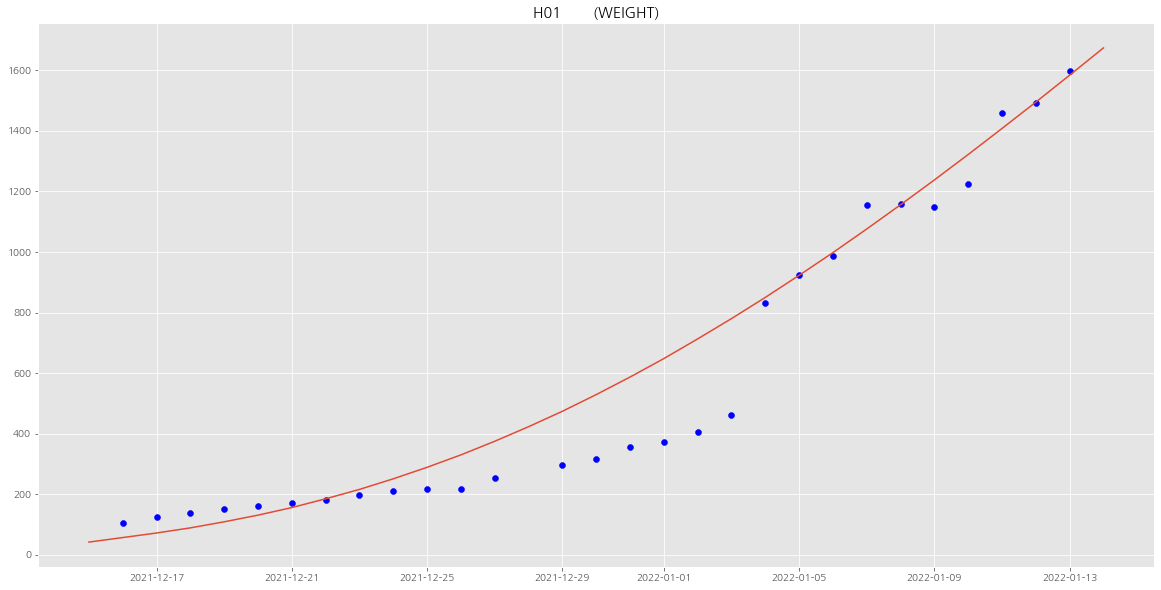

In [10]:
plt.figure(figsize=(20,10))
plt.title('H01        (WEIGHT)')
plt.plot(df_standard['date'], df_standard['weight'])
plt.scatter(df_total_h01_group.index, df_total_h01_group['WEIGHT_PREDICTION_WEIGHT'], color='blue')
plt.show()

In [11]:
df_total_h02 = df_total[(df_total['HOUSE_ID'] == 'H02')]
df_total_h02_group = df_total_h02.groupby(pd.Grouper(key="date", freq='1d')).mean()

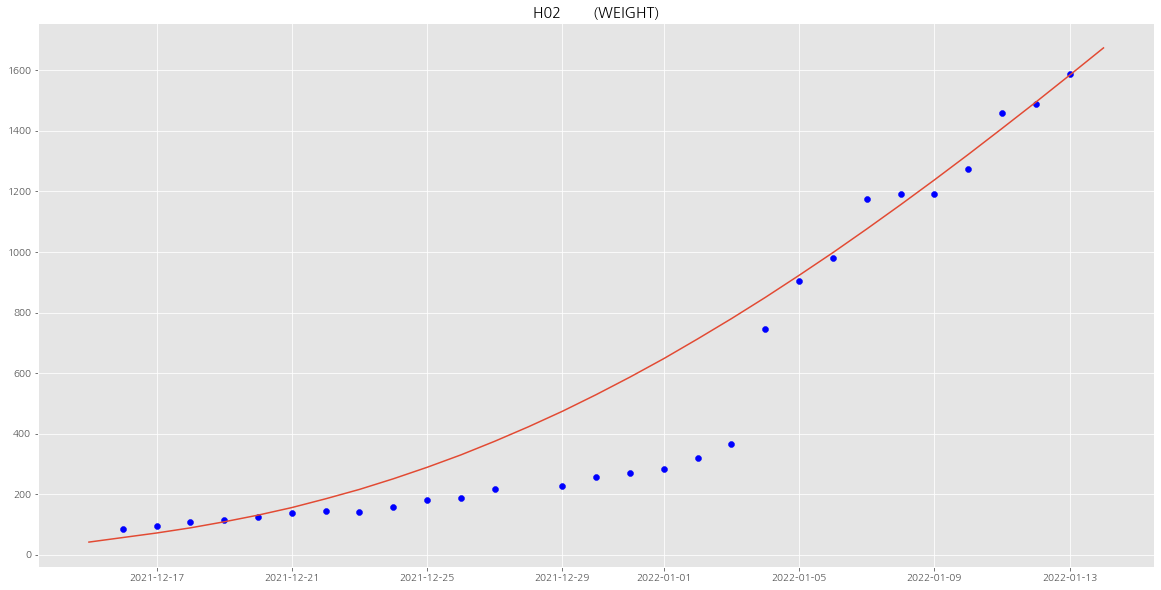

In [12]:
plt.figure(figsize=(20,10))
plt.title('H02        (WEIGHT)')
plt.plot(df_standard['date'], df_standard['weight'])
plt.scatter(df_total_h02_group.index, df_total_h02_group['WEIGHT_PREDICTION_WEIGHT'], color='blue')
plt.show()

In [13]:
df_total_h03 = df_total[(df_total['HOUSE_ID'] == 'H03')]
df_total_h03_group = df_total_h03.groupby(pd.Grouper(key="date", freq='1d')).mean()

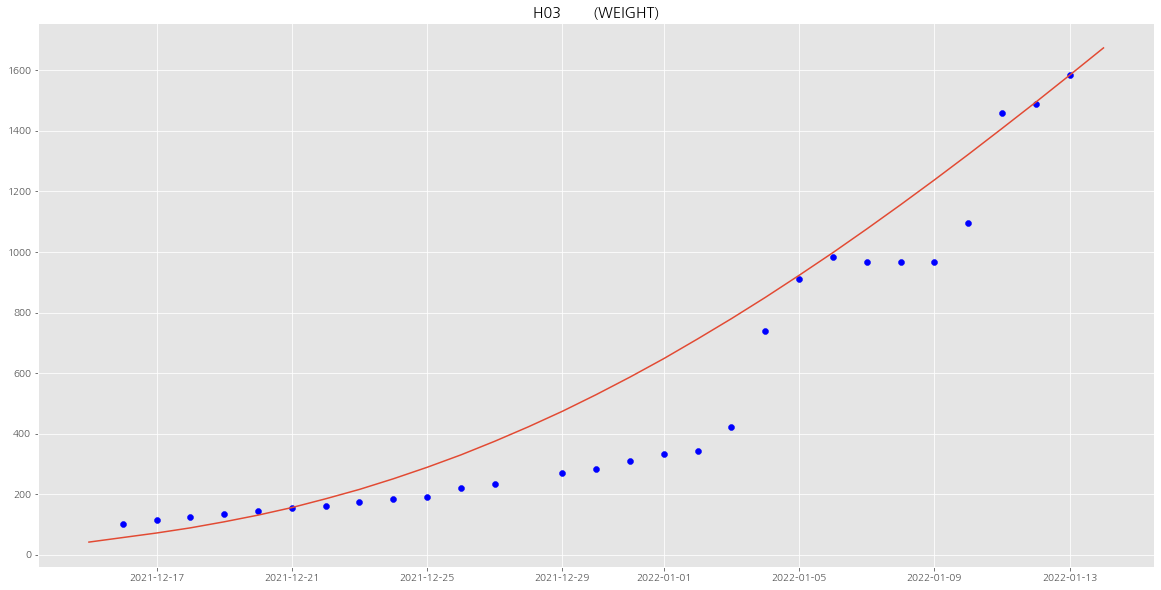

In [14]:
plt.figure(figsize=(20,10))
plt.title('H03        (WEIGHT)')
plt.plot(df_standard['date'], df_standard['weight'])
plt.scatter(df_total_h03_group.index, df_total_h03_group['WEIGHT_PREDICTION_WEIGHT'], color='blue')
plt.show()

In [15]:
df_total_h04 = df_total[(df_total['HOUSE_ID'] == 'H04')]
df_total_h04_group = df_total_h04.groupby(pd.Grouper(key="date", freq='1d')).mean()

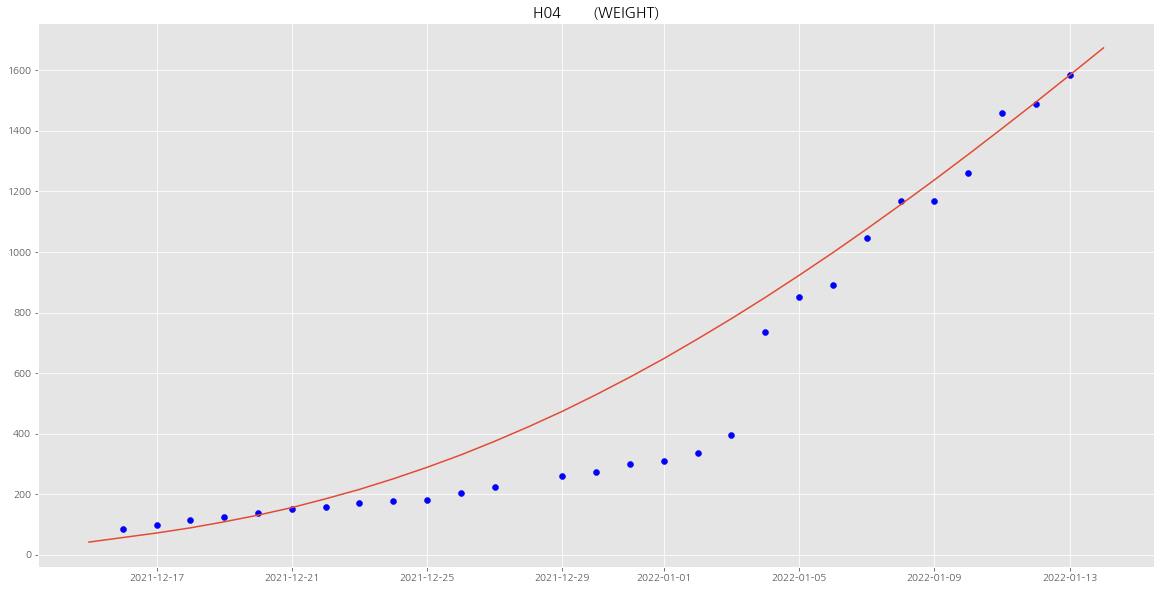

In [16]:
plt.figure(figsize=(20,10))
plt.title('H04        (WEIGHT)')
plt.plot(df_standard['date'], df_standard['weight'])
plt.scatter(df_total_h04_group.index, df_total_h04_group['WEIGHT_PREDICTION_WEIGHT'], color='blue')
plt.show()

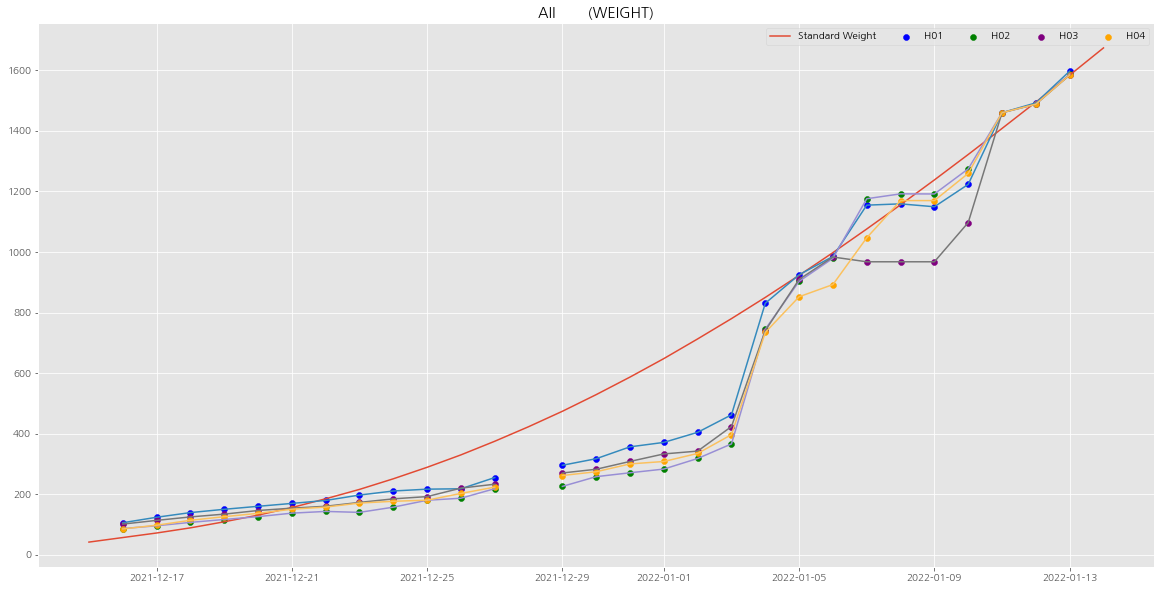

In [17]:
plt.figure(figsize=(20,10))
plt.title('All        (WEIGHT)')
plt.plot(df_standard['date'], df_standard['weight'], label='Standard Weight')

plt.scatter(df_total_h01_group.index, df_total_h01_group['WEIGHT_PREDICTION_WEIGHT'], color='blue', label='H01')
plt.plot(df_total_h01_group.index, df_total_h01_group['WEIGHT_PREDICTION_WEIGHT'])

plt.scatter(df_total_h02_group.index, df_total_h02_group['WEIGHT_PREDICTION_WEIGHT'], color='green', label='H02')
plt.plot(df_total_h02_group.index, df_total_h02_group['WEIGHT_PREDICTION_WEIGHT'])

plt.scatter(df_total_h03_group.index, df_total_h03_group['WEIGHT_PREDICTION_WEIGHT'], color='purple', label='H03')
plt.plot(df_total_h03_group.index, df_total_h03_group['WEIGHT_PREDICTION_WEIGHT'])

plt.scatter(df_total_h04_group.index, df_total_h04_group['WEIGHT_PREDICTION_WEIGHT'], color='orange', label='H04')
plt.plot(df_total_h04_group.index, df_total_h04_group['WEIGHT_PREDICTION_WEIGHT'])

plt.legend(loc='best', ncol=5)
plt.show()

<ipython-input-18-76b3d5bea97c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_h01['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_total_h01['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_mean)
<ipython-input-18-76b3d5bea97c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_h02['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_total_h02['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_mean)
<ipython-input-18-76b3d5bea97c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


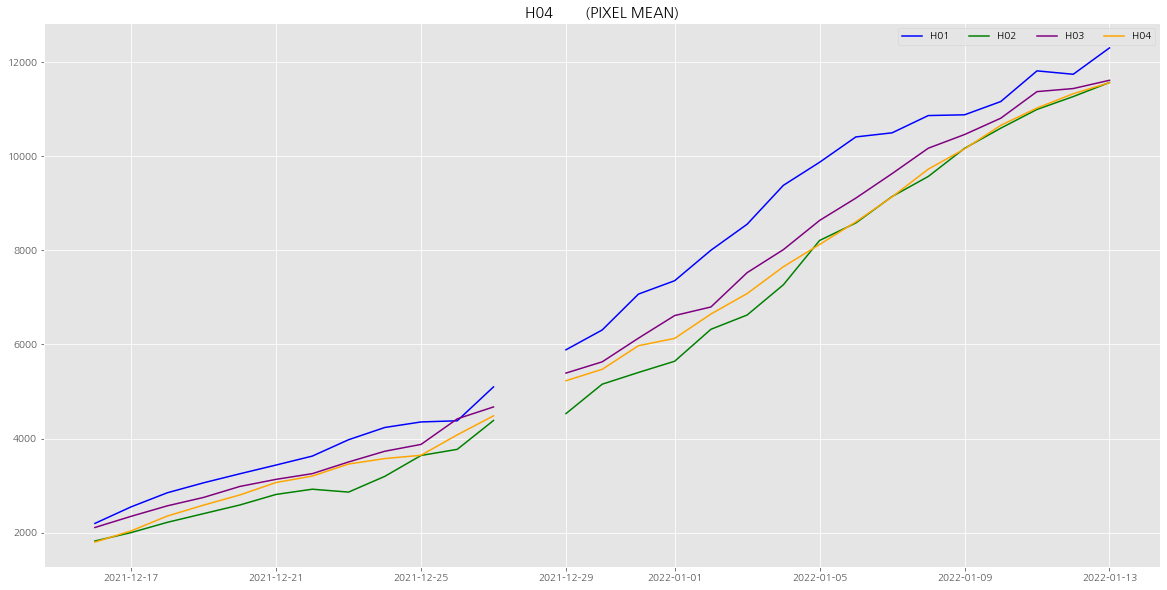

In [18]:
df_total_h01 = df_total[(df_total['HOUSE_ID'] == 'H01')]
df_total_h02 = df_total[(df_total['HOUSE_ID'] == 'H02')]
df_total_h03 = df_total[(df_total['HOUSE_ID'] == 'H03')]
df_total_h04 = df_total[(df_total['HOUSE_ID'] == 'H04')]

def pixel_mean(x):
    x = x.replace('[',"")
    x = x.replace(']',"")
    arr_list = list(map(int, x.split(",")))
    result = round(sum(arr_list) / len(arr_list),1)
    return result

plt.figure(figsize=(20,10))
plt.title('All        (PIXEL)')

df_total_h01['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_total_h01['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_mean)
df_total_h01_group = df_total_h01.groupby(pd.Grouper(key="date", freq='1d')).mean()

plt.title('H01        (PIXEL MEAN)')
plt.plot(df_total_h01_group.index, df_total_h01_group['WEIGHT_PREDICTION_PIXEL_MEAN'], color='blue', label='H01')

df_total_h02['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_total_h02['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_mean)
df_total_h02_group = df_total_h02.groupby(pd.Grouper(key="date", freq='1d')).mean()

plt.title('H02        (PIXEL MEAN)')
plt.plot(df_total_h02_group.index, df_total_h02_group['WEIGHT_PREDICTION_PIXEL_MEAN'], color='green', label='H02')

df_total_h03['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_total_h03['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_mean)
df_total_h03_group = df_total_h03.groupby(pd.Grouper(key="date", freq='1d')).mean()

plt.title('H03        (PIXEL MEAN)')
plt.plot(df_total_h03_group.index, df_total_h03_group['WEIGHT_PREDICTION_PIXEL_MEAN'], color='purple', label='H03')

df_total_h04['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_total_h04['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(pixel_mean)
df_total_h04_group = df_total_h04.groupby(pd.Grouper(key="date", freq='1d')).mean()

plt.title('H04        (PIXEL MEAN)')
plt.plot(df_total_h04_group.index, df_total_h04_group['WEIGHT_PREDICTION_PIXEL_MEAN'], color='orange', label='H04')

plt.legend(loc='best', ncol=4)
plt.show()

### 막곡농장 12-16(NAS) - 12-16(NEW) 비교

In [19]:
# 데이터 로드
df_2021_12_16_NAS = pd.read_csv("data/막곡 2021-12-16(NAS).csv")
df_2021_12_16_NAS.shape

(138, 14)

In [20]:
# drop null
df_2021_12_16_NAS = df_2021_12_16_NAS[(~(df_2021_12_16_NAS['WEIGHT_PREDICTION_WEIGHT'] == '\\N'))]
df_2021_12_16_NAS = df_2021_12_16_NAS[~df_2021_12_16_NAS['WEIGHT_PREDICTION_PIXEL_MEAN'].isnull()]
df_2021_12_16_NAS['date'] = pd.to_datetime(df_2021_12_16_NAS.CREATE_TIME, format='%Y-%m-%d %H:%M:%S')

# # drop outlier 
# df_2021_12_16_NAS = df_2021_12_16_NAS[df_2021_12_16_NAS.no_distortion_pixel_mean < 10000]


In [21]:
def data_apply(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.split(',')
    
    sum_value = 0
    for i in range(0, len(x)):
        sum_value +=float(x[i])
        
    result = round(sum_value/len(x), 1)
    
    return result
    

df_2021_12_16_NAS['WEIGHT_PREDICTION_PIXEL_MEAN'] = df_2021_12_16_NAS['WEIGHT_PREDICTION_PIXEL_MEAN'].apply(data_apply)

In [22]:
df_2021_12_16_NAS['WEIGHT_PREDICTION_PIXEL_MEAN']

68     2206.0
69     2163.4
70     2192.5
71     1802.0
72     2164.0
        ...  
133    2159.3
134    2469.0
135    2337.7
136    2586.0
137    2619.0
Name: WEIGHT_PREDICTION_PIXEL_MEAN, Length: 69, dtype: float64

In [23]:
# 데이터 로드
df_2021_12_16 = pd.read_csv("data/막곡 2021-12-16.csv")
df_2021_12_16.shape

(64, 5)

In [24]:
df_2021_12_16['date'] = df_2021_12_16['date'].astype(str)
df_2021_12_16['date'] = pd.to_datetime(df_2021_12_16['date'])

# drop outlier 
df_2021_12_16 = df_2021_12_16[df_2021_12_16.pixel_mean < 4000]

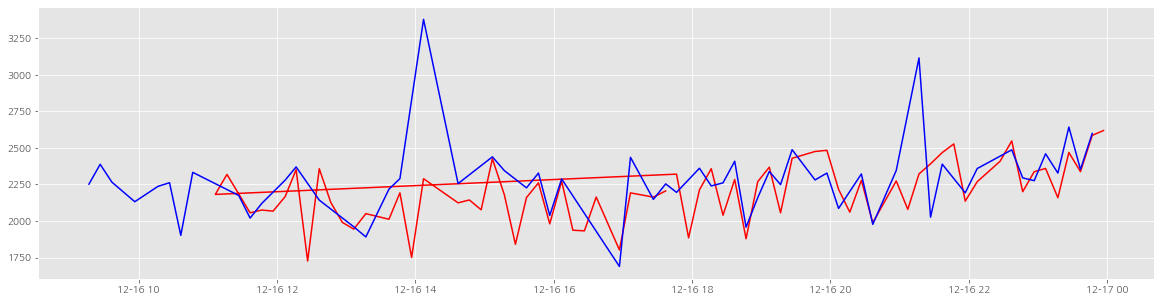

In [25]:
plt.figure(figsize=(20,5))
plt.plot(df_2021_12_16_NAS['date'], df_2021_12_16_NAS['WEIGHT_PREDICTION_PIXEL_MEAN'], color ='red')

plt.plot(df_2021_12_16['date'], df_2021_12_16['pixel_mean'], color ='blue')
plt.show()

### 센서 데이터 (Sensor Data)

In [26]:
df_sensor = pd.read_csv("data/막곡농장(NAS) 2021-12-16 ~ 2022-01-13 (sensor).csv")
df_sensor.shape

(2212540, 10)

In [27]:
df_sensor.isnull().sum()

TID                0
CREATE_TIME        0
FARM_ID            0
GATEWAY_ID         0
HOUSE_ID           0
MODULE_ID          0
SENSOR_TYPE        0
SENSOR_DATA        0
SENSOR_TIME        0
SENSOR_INFO    84349
dtype: int64

In [28]:
df_sensor['CREATE_TIME'] = pd.to_datetime(df_sensor['CREATE_TIME'])

In [29]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212540 entries, 0 to 2212539
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   TID          object        
 1   CREATE_TIME  datetime64[ns]
 2   FARM_ID      object        
 3   GATEWAY_ID   object        
 4   HOUSE_ID     object        
 5   MODULE_ID    int64         
 6   SENSOR_TYPE  object        
 7   SENSOR_DATA  float64       
 8   SENSOR_TIME  int64         
 9   SENSOR_INFO  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 168.8+ MB


In [30]:
df_sensor = df_sensor[['CREATE_TIME', 'HOUSE_ID', 'MODULE_ID', 'SENSOR_TYPE', 'SENSOR_DATA']]

In [31]:
df_sensor

,CREATE_TIME,HOUSE_ID,MODULE_ID,SENSOR_TYPE,SENSOR_DATA
0,2021-12-16 00:00:00,H01,3001,chickenweight,220.03000
1,2021-12-16 00:00:00,H01,3001,chickenweight,219.72000
2,2021-12-16 00:00:00,H01,3001,chickenweight,219.78000
3,2021-12-16 00:00:00,H01,3001,chickenweight,220.27000
4,2021-12-16 00:00:00,H01,3001,chickenweight,220.06000
...,...,...,...,...,...
2212535,2022-01-13 23:57:39,H03,2103,temp,24.09999
2212536,2022-01-13 23:58:42,H01,1201,nh3,16.44566
2212537,2022-01-13 23:58:44,H04,2104,humidity,79.90508
2212538,2022-01-13 23:58:44,H04,2104,temp,25.30001


In [32]:
df_sensor = df_sensor[~(df_sensor['SENSOR_TYPE']=='chickenweight')]

In [33]:
pivoted_df = df_sensor.pivot(index = ['CREATE_TIME','HOUSE_ID','MODULE_ID'], columns = 'SENSOR_TYPE', values = 'SENSOR_DATA')

In [34]:
pivoted_df = pivoted_df.reset_index(drop = False)

In [35]:
pivoted_df

SENSOR_TYPE,CREATE_TIME,HOUSE_ID,MODULE_ID,co2,humidity,nh3,temp
0,2021-12-16 00:00:35,H01,1201,5000.0,NaN,1.388484,NaN
1,2021-12-16 00:00:39,H02,1203,5000.0,NaN,0.846623,NaN
2,2021-12-16 00:00:45,H01,1202,5000.0,NaN,1.131752,NaN
3,2021-12-16 00:01:16,H03,2103,NaN,43.07796,NaN,41.38475
4,2021-12-16 00:01:18,H04,1207,5000.0,NaN,0.049890,NaN
...,...,...,...,...,...,...,...
43758,2022-01-13 23:56:05,H04,1208,4772.0,NaN,13.763920,NaN
43759,2022-01-13 23:56:49,H03,1206,4381.0,NaN,0.049890,NaN
43760,2022-01-13 23:57:39,H03,2103,NaN,72.92033,NaN,24.09999
43761,2022-01-13 23:58:42,H01,1201,4599.0,NaN,16.445660,NaN


In [36]:
pivoted_df = pivoted_df[['CREATE_TIME', 'HOUSE_ID', 'co2','humidity', 'nh3', 'temp']]

In [74]:
grouped_df_mean = pivoted_df.groupby(pd.Grouper(key='CREATE_TIME' ,freq='1h')).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

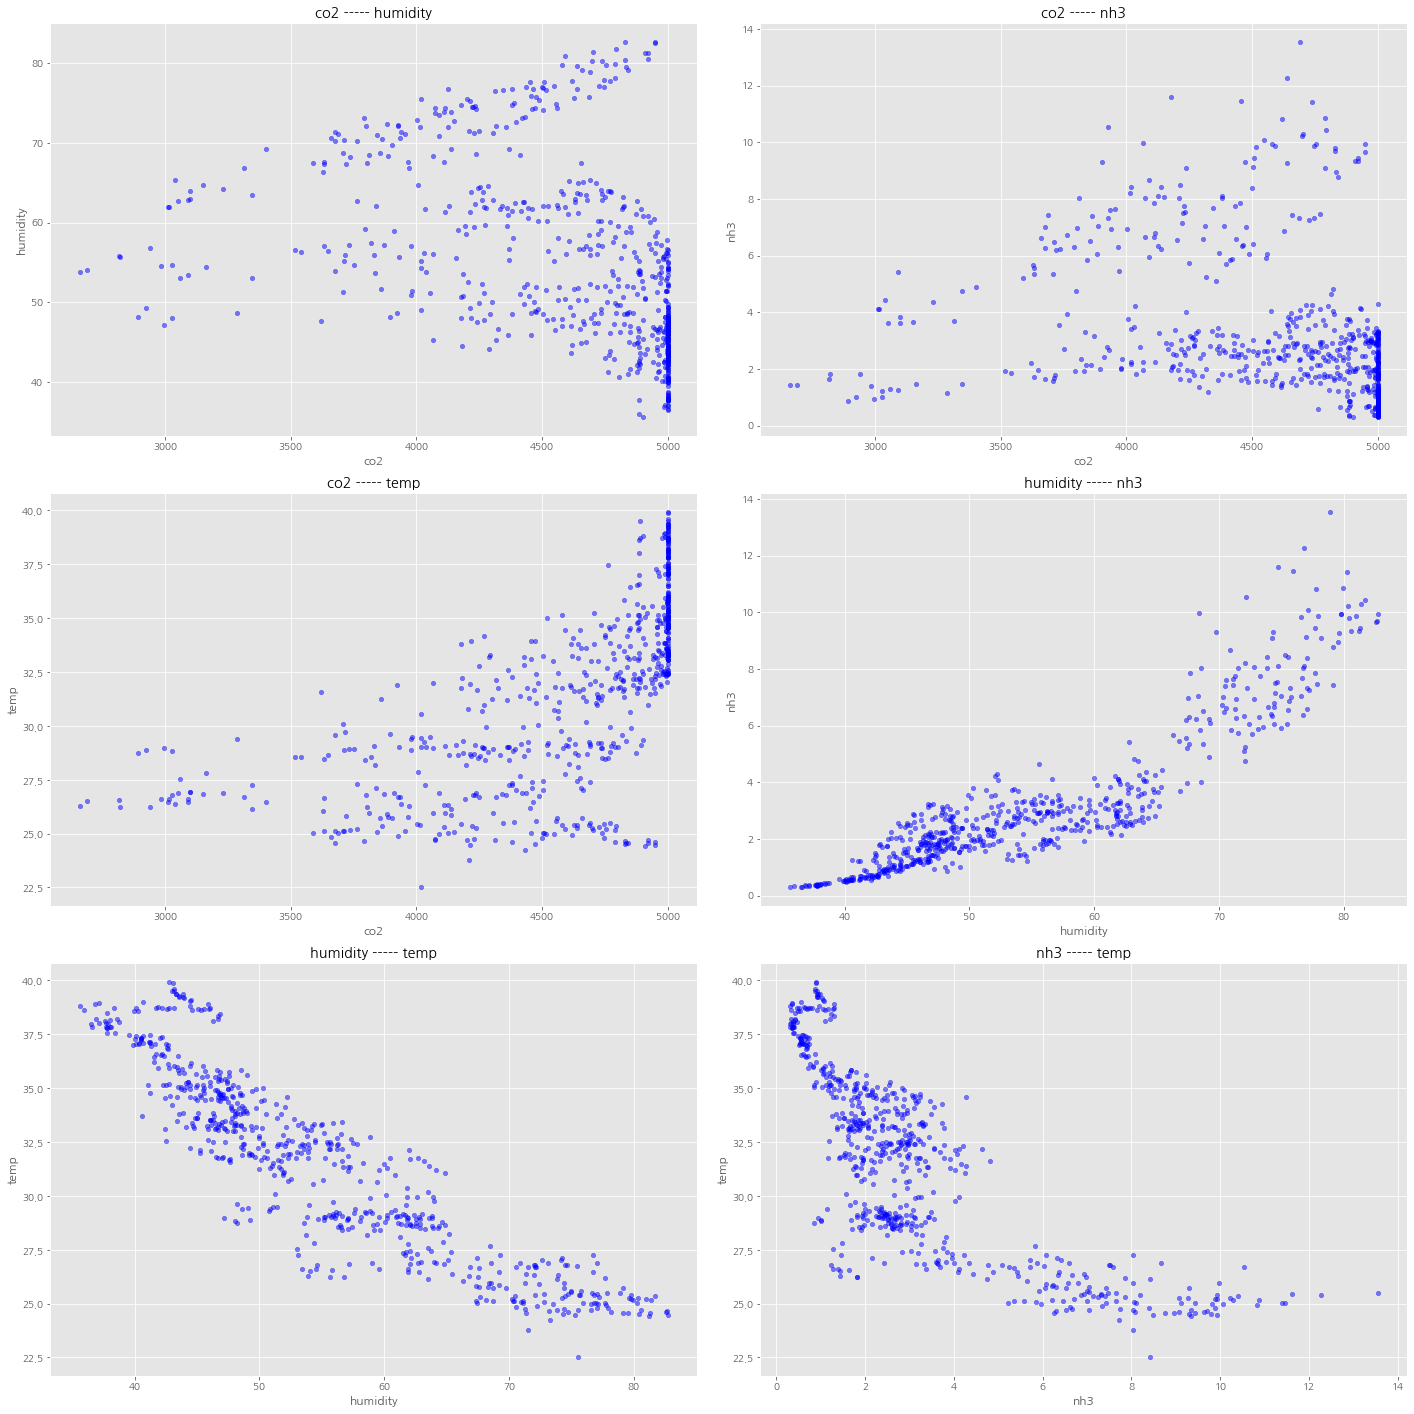

In [75]:
fig, ax = plt.subplots(3, 2, figsize=(20,20))

grouped_df_mean.plot(x='co2' ,y='humidity', color = 'blue' ,kind = "scatter" ,alpha=0.5, title ='co2 ----- humidity', ax=ax[0, 0])

grouped_df_mean.plot(x='co2' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- nh3', ax=ax[0, 1])

grouped_df_mean.plot(x='co2' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='co2 ----- temp', ax=ax[1, 0])

grouped_df_mean.plot(x='humidity' ,y='nh3', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- nh3', ax=ax[1, 1])

grouped_df_mean.plot(x='humidity' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='humidity ----- temp', ax=ax[2, 0])

grouped_df_mean.plot(x='nh3' ,y='temp', color = 'blue', kind = "scatter" ,alpha=0.5, title ='nh3 ----- temp', ax=ax[2, 1])


plt.tight_layout(pad=2, h_pad=1)
plt.show

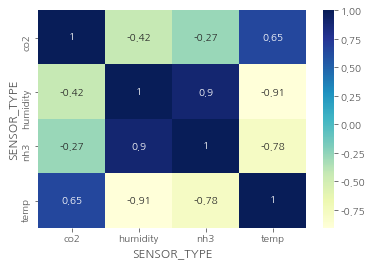

In [76]:
# heatmap 사용 결과
sns.heatmap(grouped_df_mean.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [65]:
pivoted_df_h01 = pivoted_df[pivoted_df['HOUSE_ID']=='H01']
pivoted_df_h01 = pivoted_df_h01.groupby(pd.Grouper(key='CREATE_TIME', freq='1d')).mean()

pivoted_df_h02 = pivoted_df[pivoted_df['HOUSE_ID']=='H02']
pivoted_df_h02 = pivoted_df_h02.groupby(pd.Grouper(key='CREATE_TIME', freq='1d')).mean()

pivoted_df_h03 = pivoted_df[pivoted_df['HOUSE_ID']=='H03']
pivoted_df_h03 = pivoted_df_h03.groupby(pd.Grouper(key='CREATE_TIME', freq='1d')).mean()

pivoted_df_h04 = pivoted_df[pivoted_df['HOUSE_ID']=='H04']
pivoted_df_h04 = pivoted_df_h04.groupby(pd.Grouper(key='CREATE_TIME', freq='1d')).mean()

### 선형 보간

In [66]:
#makgok_gropued_total = pd.concat([makgok_pixel,makgok_pixel_new_model])
pivoted_df_h01 = pivoted_df_h01.interpolate()
pivoted_df_h02 = pivoted_df_h02.interpolate()
pivoted_df_h03 = pivoted_df_h03.interpolate()
pivoted_df_h04 = pivoted_df_h04.interpolate()

### Plot

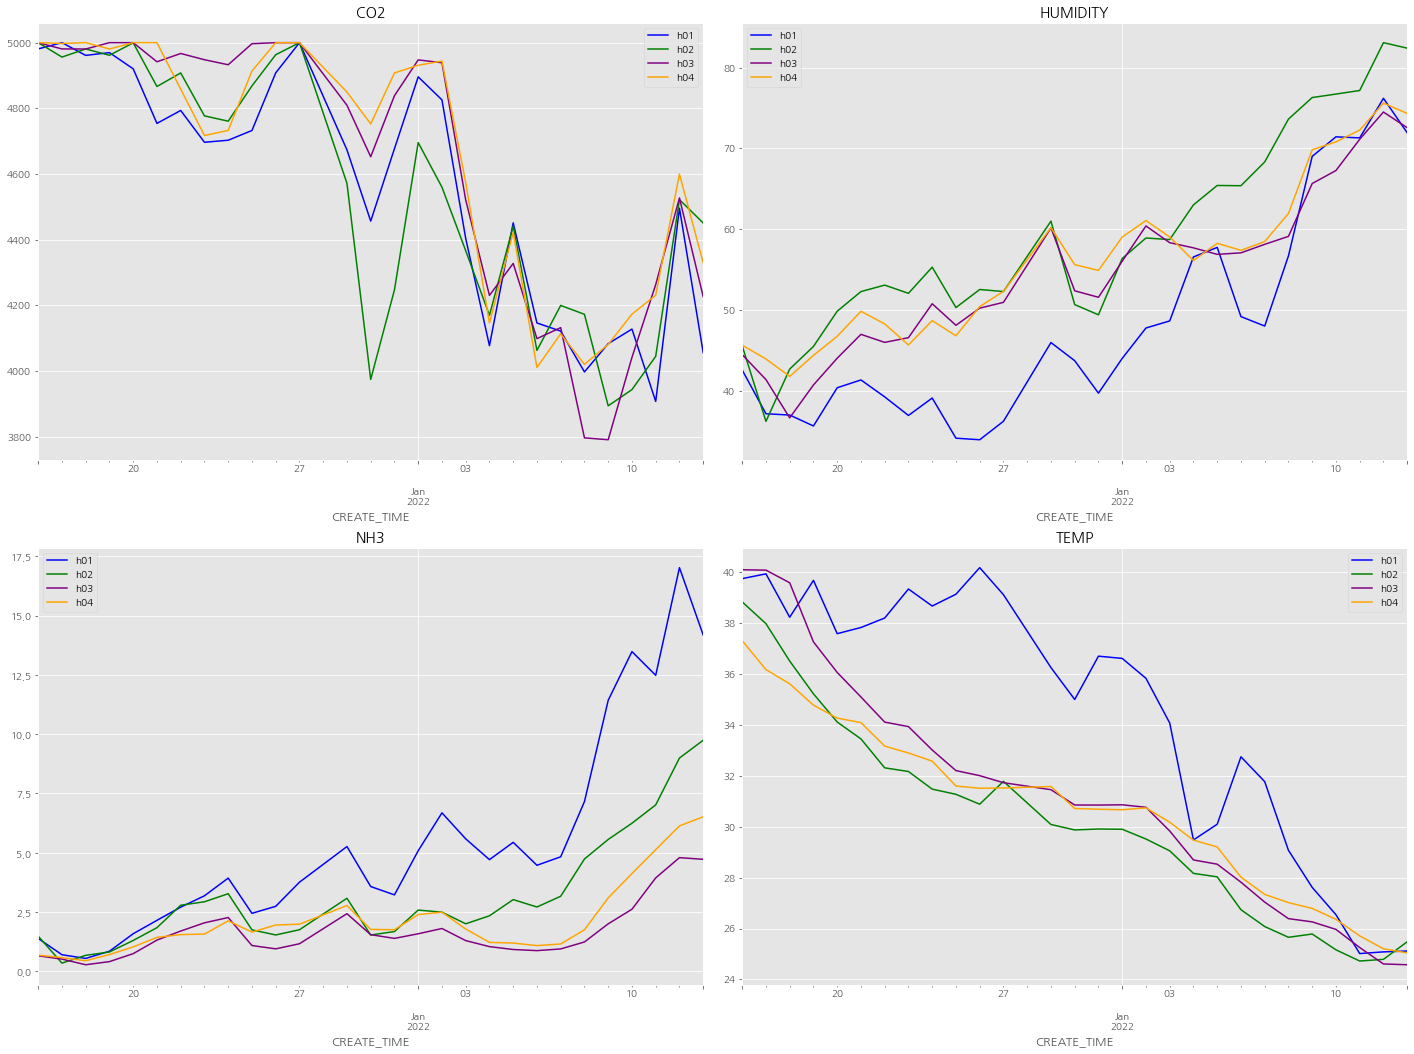

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

pivoted_df_h01.plot.line(y='co2', title='CO2', color='blue', ax = ax[0,0], label='h01')
pivoted_df_h02.plot.line(y='co2', title='CO2', color='green', ax = ax[0,0], label='h02')
pivoted_df_h03.plot.line(y='co2', title='CO2', color='purple', ax = ax[0,0], label='h03')
pivoted_df_h04.plot.line(y='co2', title='CO2', color='orange', ax = ax[0,0], label='h04')

pivoted_df_h01.plot.line(y='humidity', title='HUMIDITY', color='blue', ax = ax[0,1], label='h01')
pivoted_df_h02.plot.line(y='humidity', title='HUMIDITY', color='green', ax = ax[0,1], label='h02')
pivoted_df_h03.plot.line(y='humidity', title='HUMIDITY', color='purple', ax = ax[0,1], label='h03')
pivoted_df_h04.plot.line(y='humidity', title='HUMIDITY', color='orange', ax = ax[0,1], label='h04')

pivoted_df_h01.plot.line(y='nh3', title='NH3', color='blue', ax = ax[1,0], label='h01')
pivoted_df_h02.plot.line(y='nh3', title='NH3', color='green', ax = ax[1,0], label='h02')
pivoted_df_h03.plot.line(y='nh3', title='NH3', color='purple', ax = ax[1,0], label='h03')
pivoted_df_h04.plot.line(y='nh3', title='NH3', color='orange', ax = ax[1,0], label='h04')

pivoted_df_h01.plot.line(y='temp', title='TEMP', color='blue', ax = ax[1,1], label='h01')
pivoted_df_h02.plot.line(y='temp', title='TEMP', color='green', ax = ax[1,1], label='h02')
pivoted_df_h03.plot.line(y='temp', title='TEMP', color='purple', ax = ax[1,1], label='h03')
pivoted_df_h04.plot.line(y='temp', title='TEMP', color='orange', ax = ax[1,1], label='h04')

plt.tight_layout(pad=2, h_pad=1)
plt.show()

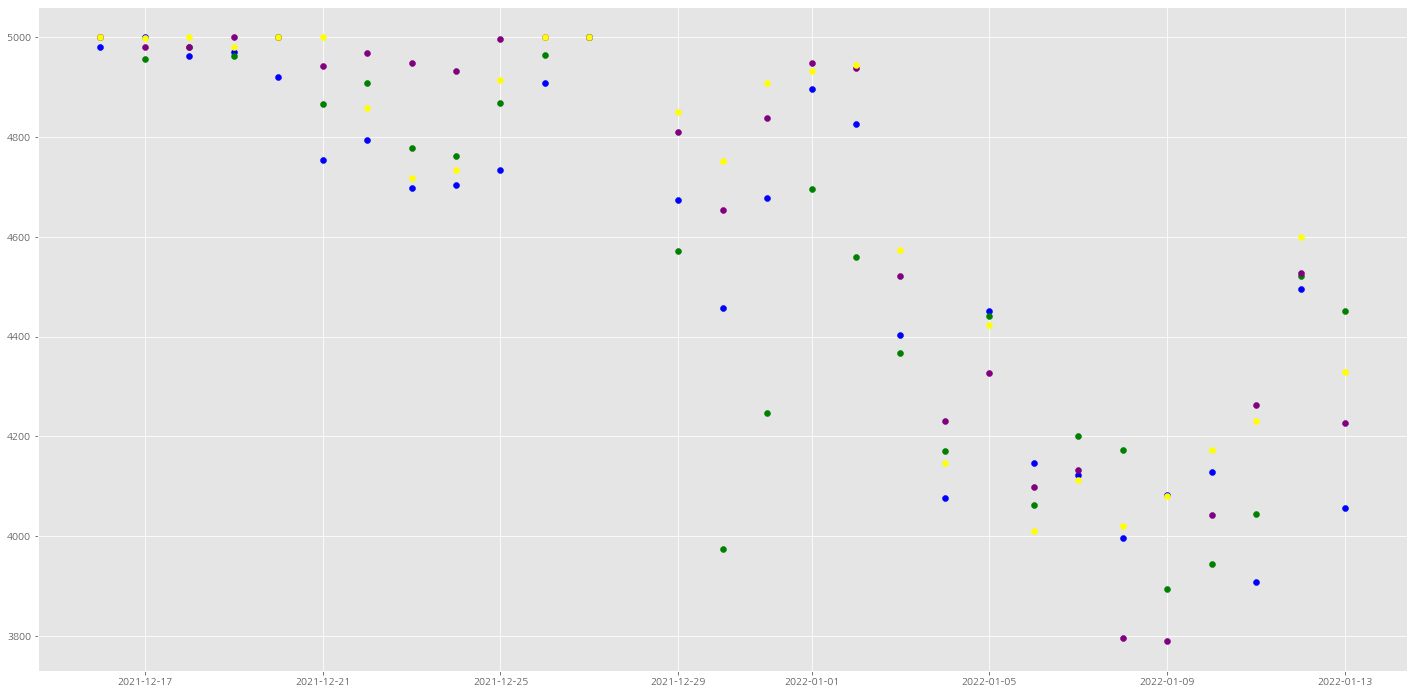

In [62]:
plt.figure(figsize=(20,10))

plt.scatter(x=pivoted_df_h01.index, y=pivoted_df_h01['co2'], color='blue', label='h01')
plt.scatter(x=pivoted_df_h02.index, y=pivoted_df_h02['co2'], color='green', label='h02')
plt.scatter(x=pivoted_df_h03.index, y=pivoted_df_h03['co2'], color='purple', label='h03')
plt.scatter(x=pivoted_df_h04.index, y=pivoted_df_h04['co2'], color='yellow', label='h04')

plt.tight_layout(pad=2, h_pad=1)
plt.show()